In [1]:
!pip install tensorflow==1.14
!pip install keras==2.3.1

     |████████████████████████████████| 109.3 MB 50 kB/s s eta 0:00:01
     |████████████████████████████████| 488 kB 42.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 49.9 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We re

In [2]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
#TRAIN AND TEST DATASET ADDRESS
DATASET="../input/bloodcells/images/TRAIN"
TEST_DATASET="../input/bloodcells/images/TEST"

#Categroized images
#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

In [6]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [7]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [8]:
print(len(train_data))
print(len(test_data))

9957
2487


In [9]:
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [10]:
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

(9957, 60, 60, 3)

In [11]:
test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

(2487, 60, 60, 3)

In [12]:
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_test=to_categorical(test_y)

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [18]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(60,60,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=4, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 58, 58, 6)         168       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               324600    
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Train on 7965 samples, validate on 1992 samples
Epoch 1/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 1.2741 - acc: 0.3174 - val_loss: 2.7063 - val_acc: 0.0000e+00
Epoch 2/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 1.2589 - acc: 0.3519 - val_loss: 2.8983 - val_acc: 0.0000e+00
Epoch 3/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 1.2058 - acc: 0.4472 - val_loss: 3.0132 - val_acc: 0.0000e+00
Epoch 4/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 1.0701 - acc: 0.5584 - val_loss: 2.7584 - val_acc: 0.0000e+00
Epoch 5/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 0.9279 - acc: 0.6294 - val_loss: 2.4377 - val_acc: 0.0000e+00
Epoch 6/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 0.8078 - acc: 0.6889 - val_loss: 2.6297 - val_acc: 0.0000e+00
Epoch 7/50
7965/7965 [==============================] - 9s 1ms/sample - loss: 0.7669 - acc: 0.7055 - val_loss: 2

In [21]:
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2487/2487 [==============================] - 1s 489us/sample - loss: 2.2824 - acc: 0.6321


(2.28237788496029, 0.6320869)

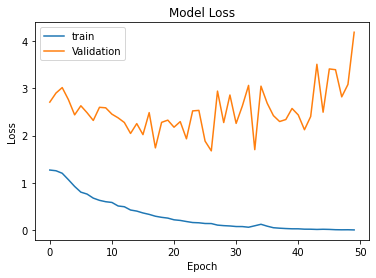

In [22]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

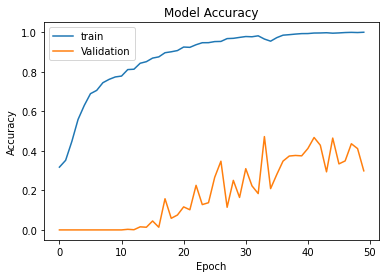

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [24]:
y_pred=model.predict_classes(test_X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=2
Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=0
Actual=0, Predicted=0


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.632086851628468

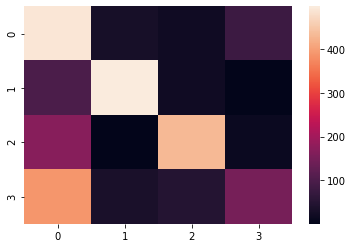

In [27]:
sns.heatmap(confusion_matrix(test_y,y_pred))

In [ ]:
model.save('bc_lenet.h5')